<a href="https://colab.research.google.com/github/jwross24/lambda-intro/blob/master/[Jonathan_Ross]_LSDS_Intro_Day_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra Applications Assignment





### Your data:

**chirps_per_sec** = chirps/sec for the striped ground cricket

**temperature** = temperature in degrees Fahrenheit

Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

In [71]:
!pip install xlrd
import pandas as pd

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')
df = df.rename(columns={'X':'chirps_per_sec', 'Y':'temperature'})

print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(15, 2)


,chirps_per_sec,temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


## 1) Graph a scatterplot of chirps_per_sec vs temperature 

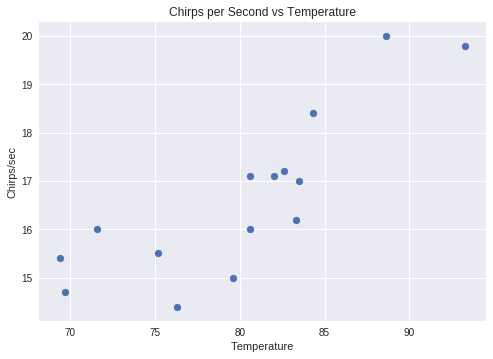

In [4]:
##### Your Code Here #####
import matplotlib.pyplot as plt

plt.scatter(df['temperature'], df['chirps_per_sec'], marker='o')
plt.xlabel('Temperature')
plt.ylabel('Chirps/sec')
plt.title('Chirps per Second vs Temperature')
plt.show()

## 2) Follow the steps below to compute the coefficients (intercept and slope) for the line of best fit:

## 2.1) Use np.ones to add a column of ones to the dataframe

In [0]:
##### Your Code Here #####
import numpy as np

df['ones'] = np.ones(15)

## 2.2) Create your X matrix from the 'ones' and 'temperature' columns

In [0]:
##### Your Code Here #####
X = df[['ones', 'temperature']].as_matrix()

## 2.3) Create your Y vector from the chips_per_sec column. (Make sure that it is formatted as a column vector.)

In [0]:
##### Your Code Here #####
Y = df['chirps_per_sec'].as_matrix().reshape(-1, 1)

## 2.4) Calculate X_transpose and print the result: $X^{T}$ 

In [8]:
##### Your Code Here #####
X_transpose = np.transpose(X)
print(X_transpose)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
  69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
  80.59999847 83.5        76.30000305]]


## 2.5) Calculate X_transpose_X and print the result: $X^{T}X$

In [9]:
##### Your Code Here #####
X_transpose_X = np.matmul(X_transpose, X)
print(X_transpose_X)

[[1.50000000e+01 1.20060000e+03]
 [1.20060000e+03 9.67258599e+04]]


## 2.6) Calculate the inverse of X_transpose_X and print the result: $(X^{T}X)^{-1}$ 

In [10]:
##### Your Code Here #####
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
print(X_transpose_X_inv)

[[ 1.02382034e+01 -1.27080669e-01]
 [-1.27080669e-01  1.58771451e-03]]


## 2.7) An aside: Multiply the X_tranpose_X matrix against its inverse: $(X^{T}X)(X^{T}X)^{-1}$  Print the result. What is the name for the resulting matrix?

In [11]:
##### Your Code Here #####
X_transpose_X_times_inv = np.matmul(X_transpose_X, X_transpose_X_inv)
print(X_transpose_X_times_inv)  # should be the identity matrix

[[1.00000000e+00 6.01565053e-17]
 [3.50588784e-13 1.00000000e+00]]


## 2.8) Calculate X_transpose_Y and print the result: $X^{T}Y$

In [12]:
##### Your Code Here #####
X_transpose_Y = np.matmul(X_transpose, Y)
print(X_transpose_Y)

[[  249.80000019]
 [20127.47000262]]


## 2.9) Finally, calculate the Beta coefficients vector by multiplying the left and right halfs of the linear regression equation. Print the Beta vector: $\beta = (X^{T}X)^{-1} X^{T}Y$  
(You should have all of the parts to do this now)

In [13]:
##### Your Code Here #####
Beta = np.matmul(X_transpose_X_inv, X_transpose_Y)
print(Beta)

[[-0.3091419 ]
 [ 0.21192498]]


## 3) Graph the line of best fit through the scatterplot of the data points

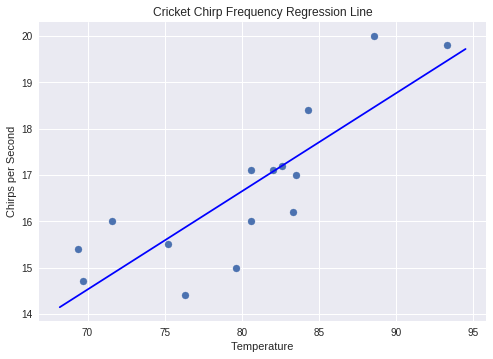

In [14]:
##### Your Code Here #####
Beta_0 = Beta[0, 0]
Beta_1 = Beta[1, 0]

plt.scatter(df['temperature'], df['chirps_per_sec'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = Beta_0 + Beta_1*x_vals
plt.plot(x_vals, y_vals, '-', color='b')
plt.xlabel('Temperature')
plt.ylabel('Chirps per Second')
plt.title('Cricket Chirp Frequency Regression Line')
plt.show()

## 4) If a cricket has chirped 19 times in a second what is the predicted temperature? Plot this prediction as well.

91.11310072893363


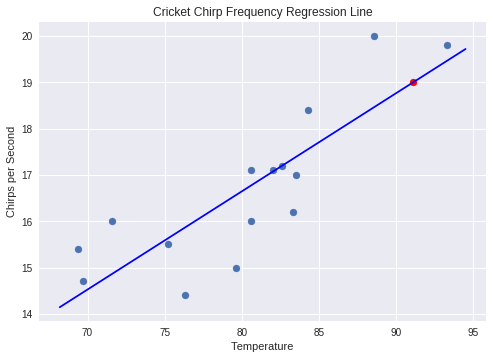

In [15]:
##### Your Code Here #####
x_19 = (19 - Beta_0)/Beta_1
print(x_19)

plt.scatter(df['temperature'], df['chirps_per_sec'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = Beta_0 + Beta_1*x_vals
plt.plot(x_vals, y_vals, '-', color='b')
plt.scatter(x_19, 19, color='r')
plt.xlabel('Temperature')
plt.ylabel('Chirps per Second')
plt.title('Cricket Chirp Frequency Regression Line')
plt.show()

##Stretch Problem
Let's add a 3rd dimension. 

X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

Compute the coefficients for the **plane** of best fit for

$X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$

Then graph the plane in addition to the  datapoints in a **3D** graph.
An article to get you started on [3D graphing](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [37]:
s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(s_data)
s_data.shape
s_data.describe()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
     X1  X2   X3
0   132  52  173
1   143  59  184
2   153  67  194
3   162  73  211
4   154  64  196
5   168  74  220
6   137  54  188
7   149  61  188
8   159  65  207
9   128  46  167
10  166  72  217


,X1,X2,X3
count,11.000000,11.000000,11.000000
mean,150.090909,62.454545,195.000000
std,13.626845,9.114424,17.314734
min,128.000000,46.000000,167.000000
25%,140.000000,56.500000,186.000000
50%,153.000000,64.000000,194.000000
75%,160.500000,69.500000,209.000000
max,168.000000,74.000000,220.000000


In [0]:
s_data['ones'] = np.ones(11)
X = s_data[['ones', 'X2', 'X3']].as_matrix()
Y = s_data['X1'].as_matrix().reshape(-1, 1)
X_transpose = np.transpose(X)
X_transpose_X = np.matmul(X_transpose, X)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
X_transpose_Y = np.matmul(X_transpose, Y)
Beta = np.matmul(X_transpose_X_inv, X_transpose_Y)

In [0]:
from mpl_toolkits import mplot3d

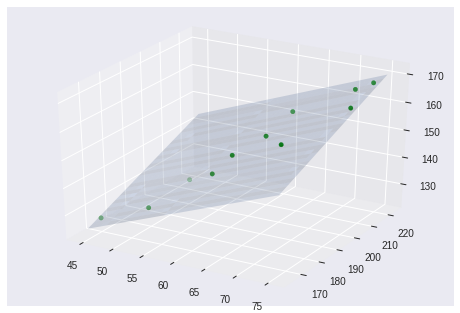

In [73]:
# Function to calculate plane of best fit
def f(X2, X3, Beta):
  return Beta[1, 0]*X2 + Beta[2, 0]*X3 + Beta[0, 0]

# Create the 3D figure
fig = plt.figure()
ax = plt.axes(projection='3d')

# Add the data points to the figure
ax.scatter(s_data['X2'], s_data['X3'], s_data['X1'], color='g')

# Get the min and max values of axes
x_vals = np.array(ax.get_xlim())
y_vals = np.array(ax.get_ylim())

# Calculate meshgrid for the plane based on the axes
x = np.linspace(x_vals[0], x_vals[1], 30)
y = np.linspace(y_vals[0], y_vals[1], 30)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy, Beta)

# Plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.2)